In [1]:
# General Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# NLP packages
import nltk
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sushmapawar/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
#to store the new CSV file
OUTPUT_PATH = '/Users/sushmapawar/Desktop/Projects/SentimentalAnalysis/'

In [3]:
# Read the Dataset
zomato = pd.read_csv(r'/Users/sushmapawar/Desktop/Projects/SentimentalAnalysis/sentiment_analysis_output.csv')

In [4]:
zomato.shape
# Remove not required columns
# zomato = zomato.drop(['Unnamed: 0'],axis=1)
# zomato = zomato.drop(['Restaurant_Name', 'Restaurant_rated','Review_Written_By'], axis=1)
# print(zomato)

(3306, 6)

In [5]:
# to know the datatypes
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3306 entries, 0 to 3305
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3306 non-null   int64  
 1   Restaurant_Name        3306 non-null   object 
 2   Restaurant_rated       3306 non-null   float64
 3   Review_Written_By      3306 non-null   object 
 4   User_Rated_Restaurant  3306 non-null   float64
 5   Written_Review         1909 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 155.1+ KB


In [6]:
# Check the head function
print('FIRST ROWS OF DATAFRAME ARE:\n',zomato.head())

FIRST ROWS OF DATAFRAME ARE:
    Unnamed: 0 Restaurant_Name  Restaurant_rated Review_Written_By  \
0           0            Toit               4.7   Brijmohan Patil   
1           1            Toit               4.7    Jasleen Rajpal   
2           2            Toit               4.7       Rukmini Das   
3           3            Toit               4.7     Ritu Upadhyay   
4           4            Toit               4.7          Sambhavi   

   User_Rated_Restaurant                                     Written_Review  
0                    4.0                                                NaN  
1                    5.0  Best food ever! And the packaging was a solid ...  
2                    4.0  crumb could be a litter lesser n fish more,non...  
3                    1.0                                                NaN  
4                    5.0                                                NaN  


In [7]:
# # Check the nulls
print('How many NULLS are their in zomato Dataframe:\n',zomato.isnull().sum())

How many NULLS are their in zomato Dataframe:
 Unnamed: 0                  0
Restaurant_Name             0
Restaurant_rated            0
Review_Written_By           0
User_Rated_Restaurant       0
Written_Review           1397
dtype: int64


### --------------------DATA PREPARATION--------------------------------

In [8]:
# replacing blanks in Written_Review with "-"
zomato["Written_Review"].fillna("-",inplace=True)
print(zomato)

      Unnamed: 0 Restaurant_Name  Restaurant_rated  Review_Written_By  \
0              0            Toit               4.7    Brijmohan Patil   
1              1            Toit               4.7     Jasleen Rajpal   
2              2            Toit               4.7        Rukmini Das   
3              3            Toit               4.7      Ritu Upadhyay   
4              4            Toit               4.7           Sambhavi   
...          ...             ...               ...                ...   
3301        3301     Cafe Paashh               4.9      Shuchi Saxena   
3302        3302     Cafe Paashh               4.9   Mohnish Chordiya   
3303        3303     Cafe Paashh               4.9  Aditya Shrimankar   
3304        3304     Cafe Paashh               4.9           Nehaa T.   
3305        3305     Cafe Paashh               4.9       Dishita Shah   

      User_Rated_Restaurant                                     Written_Review  
0                       4.0               

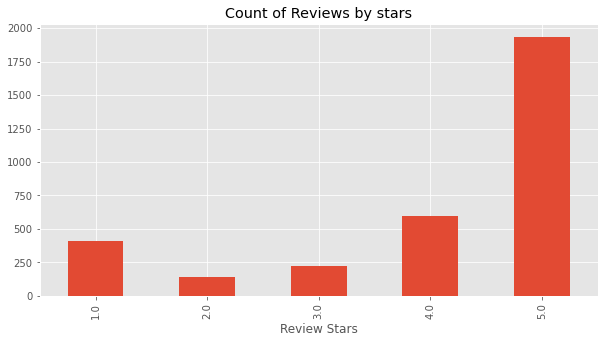

In [9]:
# to see most of the reviews are what
# biased towards positive reviews
zomato.User_Rated_Restaurant = round(zomato['User_Rated_Restaurant'])
zomato.User_Rated_Restaurant
ax = zomato['User_Rated_Restaurant'].value_counts().sort_index().\
      plot(kind ='bar',title = 'Count of Reviews by stars',figsize=(10,5))
ax.set_xlabel('Review Stars')
plt.show()

### SentimentIntensityAnalyzer is used to get pos,neu,neg score of text
#### this uses bag-of-words approach:1)Stopwords are removed 2)each word is scored and combined to a total score.
#### takes all the words in a sentence and has a value either pos,neutral,negative for each of those words 
#### and combines as math equation and to all words it will tell how pos,neg,neu that the statement is based on that words
#### stopwords are the words that does not have pos,neu,neg meaning

In [10]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

# based on words it will tell what the sentiment is
sia = SentimentIntensityAnalyzer()

In [11]:
# run the polarity on the entire dataset
# compound is aggregation of po,neu,neg values ,represents how neg to pos it is
res = {}
for i,row in tqdm(zomato.iterrows(),total=len(zomato)):
  text = row['Written_Review']
  myid = row['Unnamed: 0']
  res[myid] = sia.polarity_scores(text)
res

  0%|          | 0/3306 [00:00<?, ?it/s]

{0: {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0},
 1: {'neg': 0.0, 'neu': 0.438, 'pos': 0.562, 'compound': 0.8829},
 2: {'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'compound': 0.3612},
 3: {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0},
 4: {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0},
 6: {'neg': 0.0, 'neu': 0.633, 'pos': 0.367, 'compound': 0.4404},
 7: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 8: {'neg': 0.033, 'neu': 0.833, 'pos': 0.133, 'compound': 0.7003},
 9: {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0},
 10: {'neg': 0.0, 'neu': 0.815, 'pos': 0.185, 'compound': 0.8436},
 11: {'neg': 0.052, 'neu': 0.623, 'pos': 0.325, 'compound': 0.8885},
 12: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 13: {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0},
 14: {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0},
 15: {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0},
 16:

### VADER = Valence Aware Dictionary and Entiment Reasoner)-Bag of Words approach

In [12]:
# store in pandas dataframe ,T to flip horizontally
vaders = pd.DataFrame(res).T
vaders

,neg,neu,pos,compound
0,0.000,0.000,0.000,0.0000
1,0.000,0.438,0.562,0.8829
2,0.000,0.828,0.172,0.3612
3,0.000,0.000,0.000,0.0000
4,0.000,0.000,0.000,0.0000
...,...,...,...,...
3301,0.000,0.000,0.000,0.0000
3302,0.000,0.000,0.000,0.0000
3303,0.000,0.000,0.000,0.0000
3304,0.167,0.833,0.000,-0.3412


In [13]:
# merge to original dataframe
vaders = vaders.reset_index().rename(columns={'index':'Unnamed: 0'})
vaders = vaders.merge(zomato, how='left')
vaders
print('pos,neu,neg:\n',vaders)

pos,neu,neg:
       Unnamed: 0    neg    neu    pos  compound Restaurant_Name  \
0              0  0.000  0.000  0.000    0.0000            Toit   
1              1  0.000  0.438  0.562    0.8829            Toit   
2              2  0.000  0.828  0.172    0.3612            Toit   
3              3  0.000  0.000  0.000    0.0000            Toit   
4              4  0.000  0.000  0.000    0.0000            Toit   
...          ...    ...    ...    ...       ...             ...   
3301        3301  0.000  0.000  0.000    0.0000     Cafe Paashh   
3302        3302  0.000  0.000  0.000    0.0000     Cafe Paashh   
3303        3303  0.000  0.000  0.000    0.0000     Cafe Paashh   
3304        3304  0.167  0.833  0.000   -0.3412     Cafe Paashh   
3305        3305  0.000  0.000  0.000    0.0000     Cafe Paashh   

      Restaurant_rated  Review_Written_By  User_Rated_Restaurant  \
0                  4.7    Brijmohan Patil                    4.0   
1                  4.7     Jasleen Rajpal    

In [14]:
# dowload the Data cleaned CSV
vaders.to_csv(OUTPUT_PATH + 'Dataset_pos_neu_neg.csv')

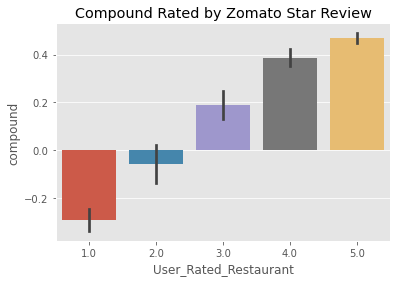

In [15]:
# plot vader
ax = sns.barplot(data=vaders,x= 'User_Rated_Restaurant',y='compound')
ax.set_title('Compound Rated by Zomato Star Review')
plt.show()

<AxesSubplot:xlabel='User_Rated_Restaurant', ylabel='pos'>

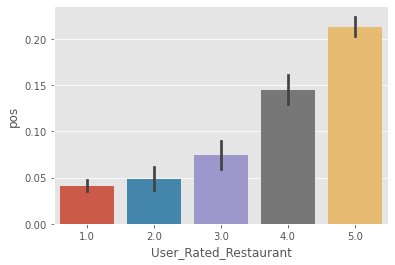

In [16]:
# plot user rated with respect to positives
sns.barplot(data=vaders,x='User_Rated_Restaurant',y = 'pos')

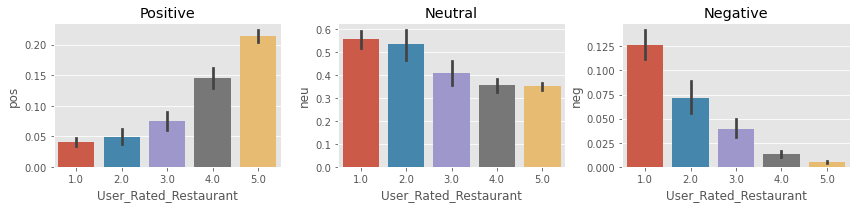

In [17]:
# plot user rated respect to pos,neg,neu
fig, axs = plt.subplots(1,3,figsize=(12,3))
sns.barplot(data=vaders,x='User_Rated_Restaurant',y = 'pos',ax=axs[0])
sns.barplot(data=vaders,x='User_Rated_Restaurant',y = 'neu',ax=axs[1])
sns.barplot(data=vaders,x='User_Rated_Restaurant',y = 'neg',ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()